In [1]:
cd 13510

In [2]:
punlearn vtbin
plist vtbin
/bin/rm -rf vtbin
mkdir vtbin


Parameters for /home/kjg/cxcds_param4/vtbin.par

        infile =                  Input image
       outfile =                  Output map
       (binimg = )                Output image file
        (shape = box)             Shape of local max mask
       (radius = 2.5)             Radius of local max mask
     (sitefile = )                Input site file
      (verbose = 1)               Tool chatter level
      (clobber = no)              Remove outfile if it already exists?
         (mode = ql)              



In [3]:
aconvolve img.fits vtbin/img.sm "lib:gaus(2,5,5,9,9)" meth=slide edge=const const=0 clob+

In [4]:
time vtbin \
  infile=vtbin/img.sm \
  outfile=vtbin/vtbin.map \
  binimg=vtbin/vtbin.img \
  mode=h clob+

vtbin
          infile = vtbin/img.sm
         outfile = vtbin/vtbin.map
          binimg = vtbin/vtbin.img
           shape = box
          radius = 2.5
        sitefile = 
         verbose = 1
         clobber = yes
            mode = h

Finding local maxima
Assigning pixels to maxima

real	0m7.460s
user	0m5.876s
sys	0m0.978s


In [5]:
dmimggrad vtbin/vtbin.map vtbin/vtbin.grad sobel mag clob+

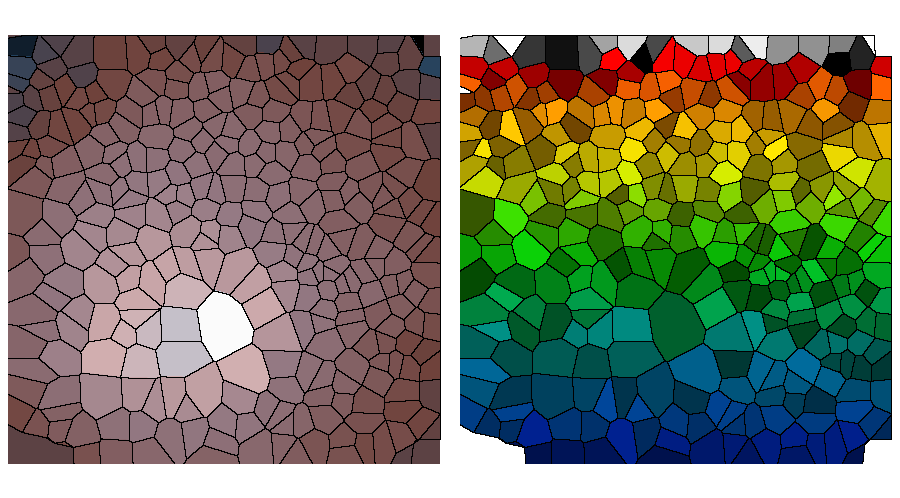

In [6]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  vtbin/vtbin.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask vtbin/vtbin.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  vtbin/vtbin.map -scale linear \
  -region delete all \
  -mask color black -mask vtbin/vtbin.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png vtbin/vtbin.abin.png -quit

display < vtbin/vtbin.abin.png

In [7]:
python << EOM 
infile="img.fits"
outfile="vtbin/random.dat"
npoints=250

from ciao_contrib.runtool import get_sky_limits
get_sky_limits(infile)
xx,yy = get_sky_limits.xygrid.split(",")
xl,xh = [float(a) for a in xx.split(":")[:-1]]
yl,yh = [float(a) for a in yy.split(":")[:-1]]

import numpy as np
np.random.seed(7773)
x_out=np.random.uniform(low=xl,high=xh,size=npoints)
y_out=np.random.uniform(low=yl,high=yh,size=npoints)

from crates_contrib.utils import write_arrays
write_arrays(outfile,[x_out,y_out],fields=["x","y"],clobber=True)

from ciao_contrib.runtool import dmcopy
dmcopy.infile = "{}[bin {}]".format(outfile,get_sky_limits.dmfilter)
dmcopy.outfile = outfile+".img"
dmcopy(clobber=True)

EOM


In [8]:
# dmimgcalc trick to copy wcs 
dmimgcalc img.fits vtbin/random.dat.img - add weight=0 weight2=1 | \
  dmimgblob - vtbin/random.sites 0.1 src+ clob+

In [9]:
time vtbin \
  infile=vtbin/img.sm \
  outfile=vtbin/sites.map \
  binimg=vtbin/sites.img \
  sitefile=vtbin/random.sites \
  mode=h clob+

vtbin
          infile = vtbin/img.sm
         outfile = vtbin/sites.map
          binimg = vtbin/sites.img
           shape = box
          radius = 2.5
        sitefile = vtbin/random.sites
         verbose = 1
         clobber = yes
            mode = h

Assigning pixels to maxima

real	0m5.627s
user	0m5.265s
sys	0m0.353s


In [10]:
dmimggrad vtbin/sites.map vtbin/sites.grad sobel mag clob+

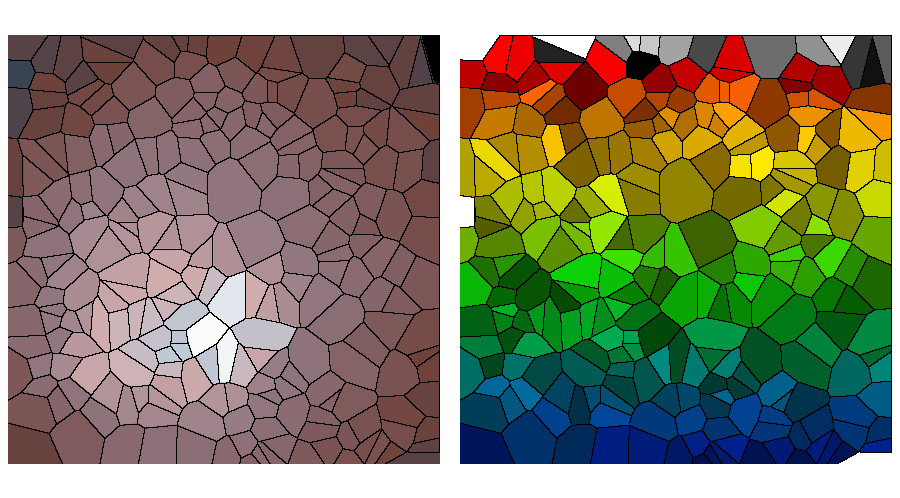

In [11]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  vtbin/sites.img -scale log \
  -block to 2 \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask vtbin/sites.grad -nomask \
  -region select all -region color black -region select none \
  vtbin/sites.map -scale linear \
  -region delete all \
  -mask color black -mask vtbin/sites.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png vtbin/sites.abin.png -quit

display < vtbin/sites.abin.png